In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import joblib

In [20]:
df = pd.read_excel('Bank_Credit.xlsx')

In [21]:
df.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,1001,39.0,9983.345,758.945417,15.0,Standard,1823.35,36.988288,NM,29.241519,261.655481,Poor
1,1002,39.0,9983.345,758.945417,15.0,Standard,1823.35,29.509423,Yes,29.241519,278.471002,Poor
2,1003,39.0,9983.345,758.945417,15.0,Standard,1823.35,39.637756,Yes,29.241519,279.003809,Standard
3,1004,39.0,9983.345,758.945417,15.0,Standard,1823.35,26.611978,NM,29.241519,264.273127,Standard
4,1005,39.0,9983.345,758.945417,15.0,Standard,1823.35,30.274878,Yes,29.241519,277.741459,Standard


In [22]:
df.describe()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
count,98960.000000,98925.000000,98910.000000,98955.000000,98955.000000,98960.000000,98960.000000,98960.000000,98960.000000
mean,50480.500000,33.283993,50470.236724,4194.883832,14.535213,1425.822977,32.285695,105.293921,403.397181
std,28567.435657,10.763789,38300.185966,3187.512715,8.738257,1154.598231,5.116646,124.993678,214.362149
min,1001.000000,14.000000,7005.930000,303.645417,1.000000,0.230000,20.000000,0.000000,0.007760
25%,25740.750000,24.000000,19310.620000,1625.165833,7.000000,565.940000,28.052567,29.059799,270.323051
50%,50480.500000,33.000000,36984.760000,3091.260833,13.000000,1166.555000,32.307069,66.033915,337.137389
75%,75220.250000,42.000000,71631.410000,5955.740000,20.000000,1945.670000,36.496462,145.475493,471.900854
max,99960.000000,56.000000,179987.280000,15204.633333,34.000000,4998.070000,50.000000,1779.103254,1602.040519


In [23]:
df.shape

(98960, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98960 entries, 0 to 98959
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        98960 non-null  int64  
 1   Age                       98925 non-null  float64
 2   Annual_Income             98910 non-null  float64
 3   Monthly_Inhand_Salary     98955 non-null  float64
 4   Interest_Rate             98955 non-null  float64
 5   Credit_Mix                98960 non-null  object 
 6   Outstanding_Debt          98960 non-null  float64
 7   Credit_Utilization_Ratio  98960 non-null  float64
 8   Payment_of_Min_Amount     98960 non-null  object 
 9   Total_EMI_per_month       98960 non-null  float64
 10  Monthly_Balance           98960 non-null  float64
 11  Credit_Score              98960 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 9.1+ MB


In [25]:
df.isnull().sum()

ID                           0
Age                         35
Annual_Income               50
Monthly_Inhand_Salary        5
Interest_Rate                5
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

In [26]:
df_cleaned = df.dropna(subset=['Annual_Income', 'Age', 'Interest_Rate', 'Monthly_Inhand_Salary'])
df_cleaned = df_cleaned.drop(columns = ['ID'])

In [27]:
df_cleaned.isnull().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Interest_Rate               0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Figure size 1200x800 with 0 Axes>

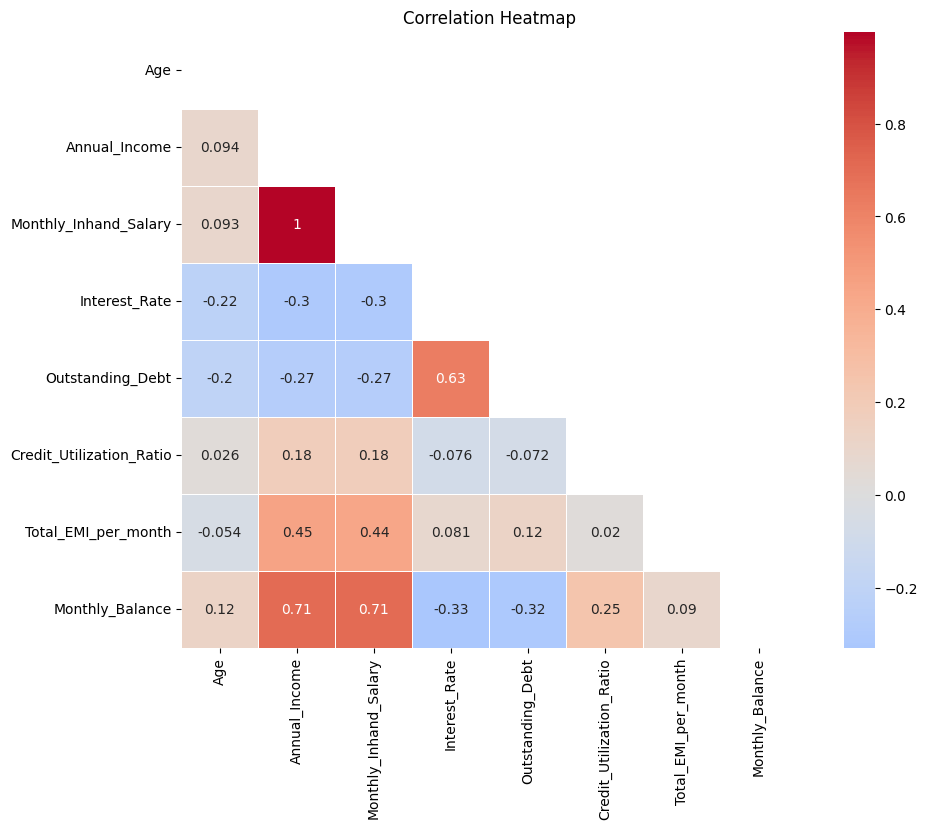

In [28]:
plt.figure(figsize=(12,8))
df2 = df_cleaned.drop(['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'], axis=1)
correlation_matrix = df2.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

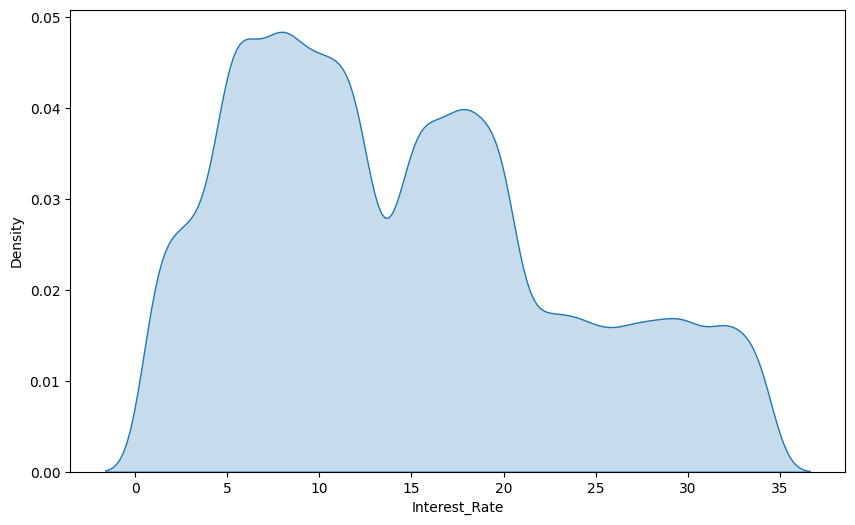

In [29]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_cleaned['Interest_Rate'], fill=True)
plt.show()

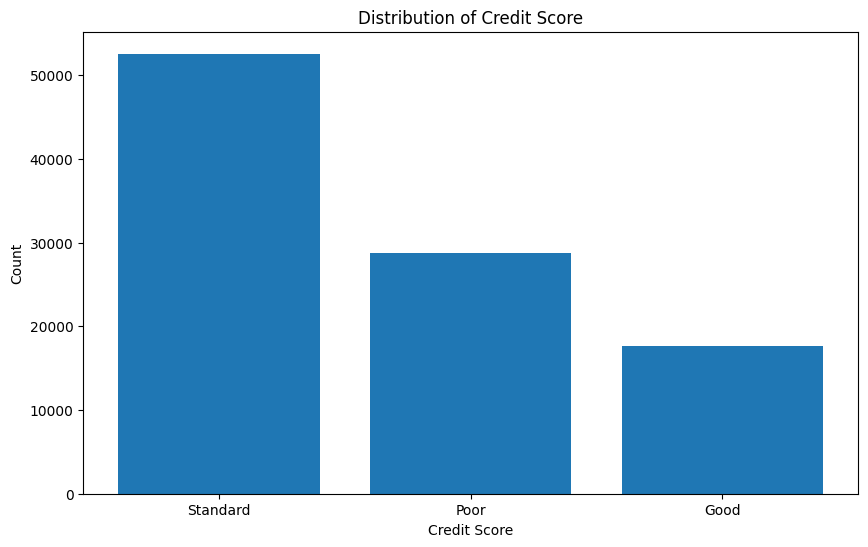

In [30]:
plt.figure(figsize=(10,6))
plt.bar(df_cleaned['Credit_Score'].value_counts().index, df_cleaned['Credit_Score'].value_counts().values)
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Score')
plt.show()


In [31]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'], drop_first=True)

In [32]:
df_encoded.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score_Poor,Credit_Score_Standard
0,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,False,True,False,False,True,False
1,39.0,9983.345,758.945417,15.0,1823.35,29.509423,29.241519,278.471002,False,True,False,True,True,False
2,39.0,9983.345,758.945417,15.0,1823.35,39.637756,29.241519,279.003809,False,True,False,True,False,True
3,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,False,True,False,False,False,True
4,39.0,9983.345,758.945417,15.0,1823.35,30.274878,29.241519,277.741459,False,True,False,True,False,True


In [33]:
cols = ['Age','Annual_Income','Monthly_Inhand_Salary','Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance']

# scale using pandas/numpy to avoid sklearn version compatibility issues
means = df_encoded[cols].mean()
stds = df_encoded[cols].std(ddof=0)  # match StandardScaler (population std)
df_scaled = (df_encoded[cols] - means) / stds
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df_encoded.index)

df_other = df_encoded.drop(columns=cols)
df_final = pd.concat([df_other, df_scaled], axis=1)

df_final.head()

,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score_Poor,Credit_Score_Standard,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
0,False,True,False,False,True,False,0.531078,-1.057176,-1.07791,0.053211,0.344288,0.918973,-0.608803,-0.661210
1,False,True,False,True,True,False,0.531078,-1.057176,-1.07791,0.053211,0.344288,-0.542702,-0.608803,-0.582765
2,False,True,False,True,False,True,0.531078,-1.057176,-1.07791,0.053211,0.344288,1.436787,-0.608803,-0.580280
3,False,True,False,False,False,True,0.531078,-1.057176,-1.07791,0.053211,0.344288,-1.108981,-0.608803,-0.648999
4,False,True,False,True,False,True,0.531078,-1.057176,-1.07791,0.053211,0.344288,-0.393101,-0.608803,-0.586169


<Axes: >

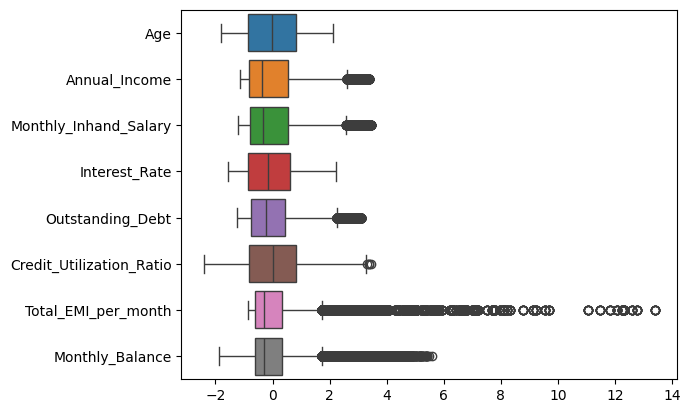

In [34]:
sns.boxplot(data=df_final[cols], orient='h')

<BarContainer object of 3 artists>

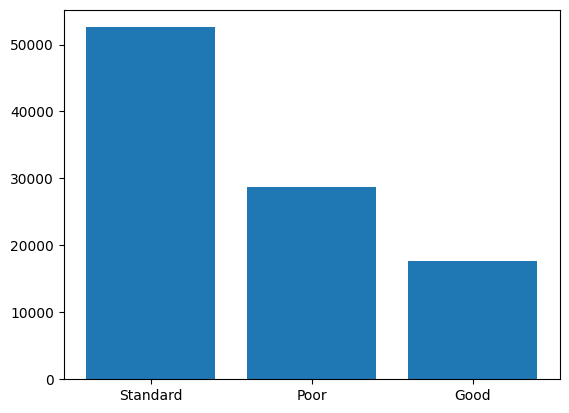

In [35]:
plt.bar(df_cleaned['Credit_Score'].value_counts().index, df_cleaned['Credit_Score'].value_counts().values)

In [36]:
df_cleaned['Credit_Score'].value_counts(normalize=True).mul(100).round(2)

Credit_Score
Standard    53.17
Poor        29.03
Good        17.80
Name: proportion, dtype: float64

In [37]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
   
    X=X.dropna()
#     print(X.isna().sum())
    v=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     print(v)
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [38]:
# features to consider removing
considered_features = ['Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt']


# compute vif 
compute_vif(considered_features)

C:\Users\96653\AppData\Local\Temp\ipykernel_25820\3299210290.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Monthly_Balance,2.081542
1,Annual_Income,273.520197
2,Monthly_Inhand_Salary,274.257486
3,Interest_Rate,1.718755
4,Outstanding_Debt,1.692636


In [39]:
considered_features.remove('Monthly_Inhand_Salary')
compute_vif(considered_features)

C:\Users\96653\AppData\Local\Temp\ipykernel_25820\3299210290.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Monthly_Balance,2.074917
1,Annual_Income,2.015345
2,Interest_Rate,1.718607
3,Outstanding_Debt,1.692628


In [40]:
df_final.drop('Monthly_Inhand_Salary', axis=1, inplace=True)

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98874 entries, 0 to 98959
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credit_Mix_Good            98874 non-null  bool   
 1   Credit_Mix_Standard        98874 non-null  bool   
 2   Payment_of_Min_Amount_No   98874 non-null  bool   
 3   Payment_of_Min_Amount_Yes  98874 non-null  bool   
 4   Credit_Score_Poor          98874 non-null  bool   
 5   Credit_Score_Standard      98874 non-null  bool   
 6   Age                        98874 non-null  float64
 7   Annual_Income              98874 non-null  float64
 8   Interest_Rate              98874 non-null  float64
 9   Outstanding_Debt           98874 non-null  float64
 10  Credit_Utilization_Ratio   98874 non-null  float64
 11  Total_EMI_per_month        98874 non-null  float64
 12  Monthly_Balance            98874 non-null  float64
dtypes: bool(6), float64(7)
memory usage: 6.6 MB


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98874 entries, 0 to 98959
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credit_Mix_Good            98874 non-null  bool   
 1   Credit_Mix_Standard        98874 non-null  bool   
 2   Payment_of_Min_Amount_No   98874 non-null  bool   
 3   Payment_of_Min_Amount_Yes  98874 non-null  bool   
 4   Credit_Score_Poor          98874 non-null  bool   
 5   Credit_Score_Standard      98874 non-null  bool   
 6   Age                        98874 non-null  float64
 7   Annual_Income              98874 non-null  float64
 8   Interest_Rate              98874 non-null  float64
 9   Outstanding_Debt           98874 non-null  float64
 10  Credit_Utilization_Ratio   98874 non-null  float64
 11  Total_EMI_per_month        98874 non-null  float64
 12  Monthly_Balance            98874 non-null  float64
dtypes: bool(6), float64(7)
memory usage: 6.6 MB


In [43]:
df_test  = pd.read_excel("Bank_Credit.xlsx", sheet_name="Test")



In [44]:
df_test 
dft_cleaned = df_test.dropna(subset=['Annual_Income', 'Age', 'Interest_Rate', 'Monthly_Inhand_Salary'])
dft_cleaned = dft_cleaned.drop(columns = ['ID'])


dft_encoded = pd.get_dummies(dft_cleaned, columns=['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'], drop_first=True)


cols = ['Age','Annual_Income','Monthly_Inhand_Salary','Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance']

# scale using pandas/numpy to avoid sklearn version compatibility issues
means = dft_encoded[cols].mean()
stds = dft_encoded[cols].std(ddof=0)  # match StandardScaler (population std)
dft_scaled = (dft_encoded[cols] - means) / stds
dft_scaled = pd.DataFrame(dft_scaled, columns=cols, index=dft_encoded.index)

dft_other = dft_encoded.drop(columns=cols)
dft_final = pd.concat([dft_other, dft_scaled], axis=1)

dft_final.head()




dft_final.drop('Monthly_Inhand_Salary', axis=1, inplace=True)

In [45]:
dft_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credit_Mix_Good            996 non-null    bool   
 1   Credit_Mix_Standard        996 non-null    bool   
 2   Payment_of_Min_Amount_No   996 non-null    bool   
 3   Payment_of_Min_Amount_Yes  996 non-null    bool   
 4   Credit_Score_Poor          996 non-null    bool   
 5   Credit_Score_Standard      996 non-null    bool   
 6   Age                        996 non-null    float64
 7   Annual_Income              996 non-null    float64
 8   Interest_Rate              996 non-null    float64
 9   Outstanding_Debt           996 non-null    float64
 10  Credit_Utilization_Ratio   996 non-null    float64
 11  Total_EMI_per_month        996 non-null    float64
 12  Monthly_Balance            996 non-null    float64
dtypes: bool(6), float64(7)
memory usage: 68.1 KB


In [46]:
labels = []

for _, row in df_final.iterrows():
    if row["Credit_Score_Poor"] == 1:
        labels.append(0)        
    elif row["Credit_Score_Standard"] == 1: 
        labels.append(1)        
    else:
        labels.append(2)        #good

df_final["label"] = labels



labeltest = []

for _, row in dft_final.iterrows():
    if row["Credit_Score_Poor"] == 1:
        labeltest.append(0)        
    elif row["Credit_Score_Standard"] == 1: 
        labeltest.append(1)        
    else:
        labeltest.append(2)        #good

dft_final["label"] = labeltest

In [47]:
X = df_final.drop([
    "Credit_Score_Poor",
    "Credit_Score_Standard",
    "label"
], axis=1)
y = df_final["label"]


X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


X_test = dft_final[X_train.columns]  
y_test = dft_final["label"]

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (79099, 11) (79099,)
Validation set: (19775, 11) (19775,)
Test set: (996, 11) (996,)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(3, activation="softmax"))

model1.compile(
    optimizer=Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model1.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    verbose=1,
    validation_data=(X_val, y_val)  
)


val_loss1, val_acc1 = model1.evaluate(X_val, y_val, verbose=0)

test_loss1, test_acc1 = model1.evaluate(X_test, y_test, verbose=0)

joblib.dump(model1, 'credit_score_model.pkl')


Epoch 1/30


c:\Users\96653\Desktop\task2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2472/2472 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6599 - loss: 0.7363 - val_accuracy: 0.6708 - val_loss: 0.7182
Epoch 2/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6683 - loss: 0.7207 - val_accuracy: 0.6706 - val_loss: 0.7101
Epoch 3/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6692 - loss: 0.7168 - val_accuracy: 0.6707 - val_loss: 0.7088
Epoch 4/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6701 - loss: 0.7145 - val_accuracy: 0.6735 - val_loss: 0.7072
Epoch 5/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6713 - loss: 0.7123 - val_accuracy: 0.6710 - val_loss: 0.7066
Epoch 6/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6705 - loss: 0.7109 - val_accuracy: 0.6758 - val_loss: 0.7042
Epoch 7/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6715 - loss: 0.7101 - val_accuracy: 0.6711 - val_loss: 0.7025
Epoch 8/30
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6717 - loss: 0.7092 - val_accurac

['credit_score_model.pkl']

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(3, activation="softmax"))

model2.compile(
    optimizer=Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model2.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    verbose=1,
    validation_data=(X_val, y_val)  
)


val_loss2, val_acc1 = model2.evaluate(X_val, y_val, verbose=0)

test_loss2, test_acc1 = model2.evaluate(X_test, y_test, verbose=0)


joblib.dump(model2, 'credit_score_model2.pkl')


Epoch 1/50


c:\Users\96653\Desktop\task2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4944/4944 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6621 - loss: 0.7322 - val_accuracy: 0.6683 - val_loss: 0.7159
Epoch 2/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6674 - loss: 0.7177 - val_accuracy: 0.6695 - val_loss: 0.7081
Epoch 3/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6682 - loss: 0.7146 - val_accuracy: 0.6706 - val_loss: 0.7078
Epoch 4/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6689 - loss: 0.7132 - val_accuracy: 0.6717 - val_loss: 0.7046
Epoch 5/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6698 - loss: 0.7117 - val_accuracy: 0.6764 - val_loss: 0.7024
Epoch 6/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6709 - loss: 0.7107 - val_accuracy: 0.6733 - val_loss: 0.7025
Epoch 7/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6700 - loss: 0.7096 - val_accuracy: 0.6749 - val_loss: 0.7022
Epoch 8/50
4944/4944 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6712 - loss: 0.7090 - val_accurac

['credit_score_model2.pkl']

In [50]:
loss1, acc1 = model1.evaluate(X_test, y_test, verbose=0)
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)

print("Model 1 Accuracy:", round(acc1, 4))
print("Model 2 Accuracy:", round(acc2, 4))


Model 1 Accuracy: 0.6968
Model 2 Accuracy: 0.6827


In [51]:
xgb1 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)

xgb1.fit(X_train, y_train)
y_val_pred_xgb1 = xgb1.predict(X_val)



joblib.dump(xgb1, 'credit_score_modelxgb1.pkl')


['credit_score_modelxgb1.pkl']

In [52]:
xgb2 = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)

xgb2.fit(X_train, y_train)
y_val_pred_xgb2 = xgb2.predict(X_val)

joblib.dump(xgb2, 'credit_score_modelxgb2.pkl')


['credit_score_modelxgb2.pkl']

In [53]:
pred1 = xgb1.predict(X_test)
pred2 = xgb2.predict(X_test)

y_test_np = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test

print("XGBoost Model 1 Accuracy:", accuracy_score(y_test_np, pred1))
print("XGBoost Model 2 Accuracy:", accuracy_score(y_test_np, pred2))


XGBoost Model 1 Accuracy: 0.6937751004016064
XGBoost Model 2 Accuracy: 0.6716867469879518


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report




param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                
    n_jobs=-1,
    scoring='accuracy'
)


grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_val_pred_rf = best_rf.predict(X_val)
y_test_pred_rf = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)



y_pred = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))



joblib.dump(best_rf, 'credit_score_rforest.pkl')


c:\Users\96653\Desktop\task2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\96653\Desktop\task2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\96653\Desktop\task2\.venv\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
  File "c:\Users\96653\Desktop\task2\.venv\Lib\site-packages\sklearn\base.py", line 492, in _validate_params
    validate_parameter_constraints(
  File "c

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.6596385542168675
              precision    recall  f1-score   support

        Poor       0.61      0.61      0.61       257
    Standard       0.71      0.71      0.71       526
        Good       0.60      0.59      0.60       213

    accuracy                           0.66       996
   macro avg       0.64      0.64      0.64       996
weighted avg       0.66      0.66      0.66       996



['credit_score_rforest.pkl']

In [55]:
X_train.shape[1]

11

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79099 entries, 14217 to 86686
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credit_Mix_Good            79099 non-null  bool   
 1   Credit_Mix_Standard        79099 non-null  bool   
 2   Payment_of_Min_Amount_No   79099 non-null  bool   
 3   Payment_of_Min_Amount_Yes  79099 non-null  bool   
 4   Age                        79099 non-null  float64
 5   Annual_Income              79099 non-null  float64
 6   Interest_Rate              79099 non-null  float64
 7   Outstanding_Debt           79099 non-null  float64
 8   Credit_Utilization_Ratio   79099 non-null  float64
 9   Total_EMI_per_month        79099 non-null  float64
 10  Monthly_Balance            79099 non-null  float64
dtypes: bool(4), float64(7)
memory usage: 5.1 MB


In [60]:
import os
print(os.getcwd())
print(os.listdir())

c:\Users\96653\Desktop\task2
['.venv', 'app.py', 'backend.py', 'Bank_Credit.xlsx', 'code.ipynb', 'credit_score_model.pkl', 'credit_score_model2.pkl', 'credit_score_modelxgb1.pkl', 'credit_score_modelxgb2.pkl', 'credit_score_rforest.pkl', 'requirements.txt', 'streamlit.py', 'test.py']
